In [1]:
import pandas as pd  # pandas used for dataframe
import numpy as np   # used for nd array 
import matplotlib.pyplot as plt    # visualization
import seaborn as sns   # statistical 
import scipy.stats as stats  # stats library to handle stats function, ,test, masked stats

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)  # generate random number

# # Create a synthetic dataset
data = {
    'productId' : range(1,21),
    'productName' : [f'product{i}' for i in range(1,21)],
    'category' : np.random.choice(['Electronic','clothing','Home','sports'],20),
    'units_sold' : np.random.poisson(lam=20, size=20),
    'sales_date' : pd.date_range(start='2023-01-01', periods=20, freq='D')
}
sales_data = pd.DataFrame(data)

# Display the first few rows of the dataset
print('sales data:')
print(sales_data)

sales data:
    productId productName    category  units_sold sales_date
0           1    product1        Home          25 2023-01-01
1           2    product2      sports          15 2023-01-02
2           3    product3  Electronic          17 2023-01-03
3           4    product4        Home          19 2023-01-04
4           5    product5        Home          21 2023-01-05
5           6    product6      sports          17 2023-01-06
6           7    product7  Electronic          19 2023-01-07
7           8    product8  Electronic          16 2023-01-08
8           9    product9        Home          21 2023-01-09
9          10   product10    clothing          21 2023-01-10
10         11   product11        Home          17 2023-01-11
11         12   product12        Home          22 2023-01-12
12         13   product13        Home          14 2023-01-13
13         14   product14        Home          17 2023-01-14
14         15   product15      sports          17 2023-01-15
15         1

In [3]:
# save the dataframe to csv file
sales_data.to_csv('sales_data.csv', index = False)  # here index=false means it generate data within a system mean here only in vs code

In [20]:
# path location
import os
os.getcwd()  # to check where file is stored

'c:\\Users\\WELCOME\\Desktop\\Python\\Statistic_workshop_Nit'

In [ ]:
# population - large group of people 
# sample - randomly pick some of individual
# descriptive stats - describe the statistic(mean,median,mode,variance, standard devaiation) of the dataset


In [12]:
# Descriptive stats
desc_stats = sales_data['units_sold'].describe()

# Display descriptive statistics
print("\nDescriptive statistic for units sold:")
print(desc_stats)

# Additional statistics
mean_sales  = sales_data['units_sold'].mean()

median_sales = sales_data['units_sold'].median()

mode_sales = sales_data['units_sold'].mode()[0]

variance_sales = sales_data['units_sold'].var()

std_sales = sales_data['units_sold'].std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']

# display result 
print('\n statistic  analysis :')
print(f"mean units sold:{mean_sales}")
print(f"median units solde :{median_sales}")
print(f"mode units sold : {mode_sales}")
print(f"variance units solde :{variance_sales}")
print(f"standard devaiation units sold : {std_sales}")
print("\ncategory Statistics")
print(category_stats)


Descriptive statistic for units sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

 statistic  analysis :
mean units sold:18.8
median units solde :18.5
mode units sold : 17
variance units solde :10.905263157894737
standard devaiation units sold : 3.302311789927586

category Statistics
     Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0  Electronic                73           18.250000               2.217356
1        Home               181           20.111111               3.723051
2    clothing                21           21.000000                    NaN
3      sports               101           16.833333               2.714160


In [ ]:
# inferential stats : always deals with probability and distribution but descriptive stats deals with numbers
# probability: dice has 6 side . prob of getting 1 is 1/6 =0.17 and so on..and graph what we achieved would be uniform distribution graph
#  roll of 2 dice -normal distribution/ gausian distri. / bell curve/ 0 symmteric
# confidence interval: if 90 percent confident then 5 percent is error 
# if p value is p < than 0.05 --> reject null hypothesis, if p >0.01--> accept null hypothesis
# population data = ztest
# sample data = T test

In [13]:
# inferential stats: in this code we findout range of unit sold at 95% confidence level ,we sold 17-20 % unit at 95 interval
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_of_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_sales/np.sqrt(len(sales_data['units_sold']))

# t score for the confidence level
t_score = stats.t.ppf((1+confidence_level)/2, degrees_of_freedom)
margin_of_error = t_score * sample_standard_error
confidence_interval = (sample_mean-margin_of_error, sample_mean + margin_of_error)
print("\n confidence  interval for mean of units solds")
print(confidence_interval)




 confidence  interval for mean of units solds
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [16]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

t_statistic , p_value = stats.ttest_1samp(sales_data['units_sold'],20)
print("\nHypothesis Testing(t-test):")
print(f"T-statistic:{t_statistic},p_value:{p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis:  the mean units sold is different from 20")
else:
    print("fail to reject the null Hypothesis : the mean units sold is not different from 20")


Hypothesis Testing(t-test):
T-statistic:-1.6250928099424466,p_value:0.12061572226781002
fail to reject the null Hypothesis : the mean units sold is not different from 20


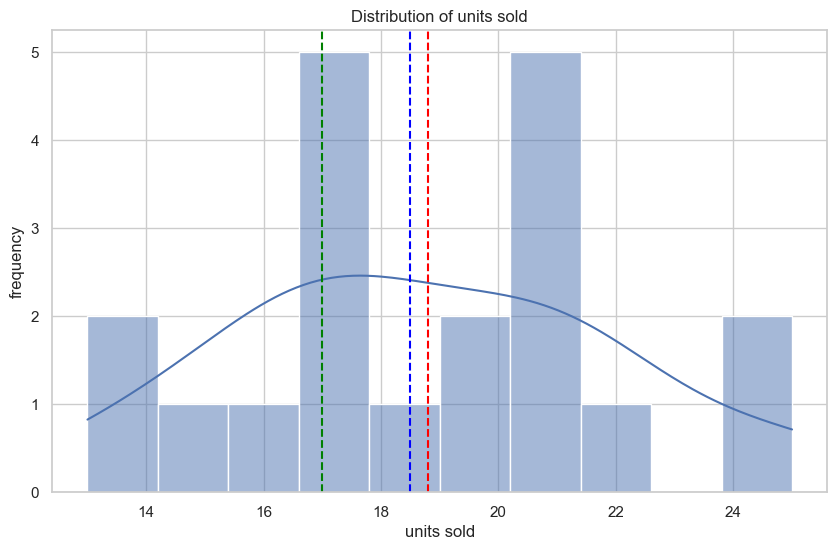

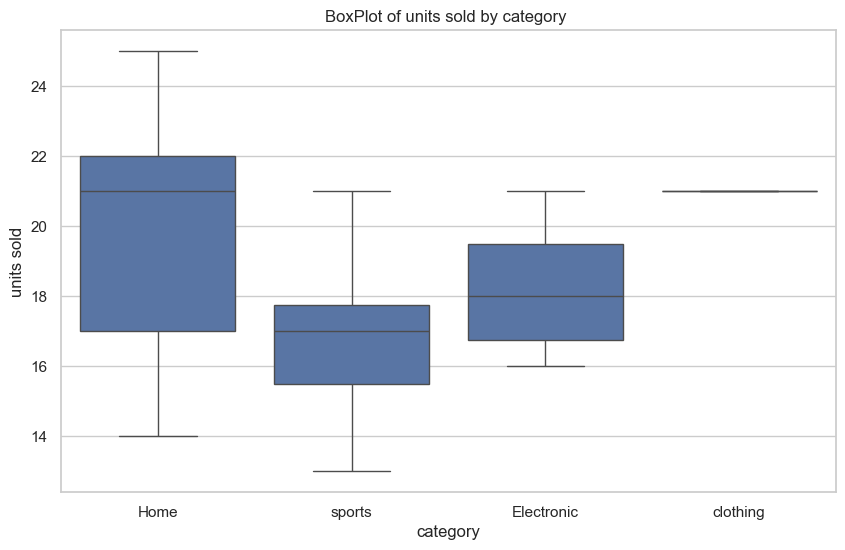

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_5420\328737356.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total Units Sold', data=category_stats,palette='bright')


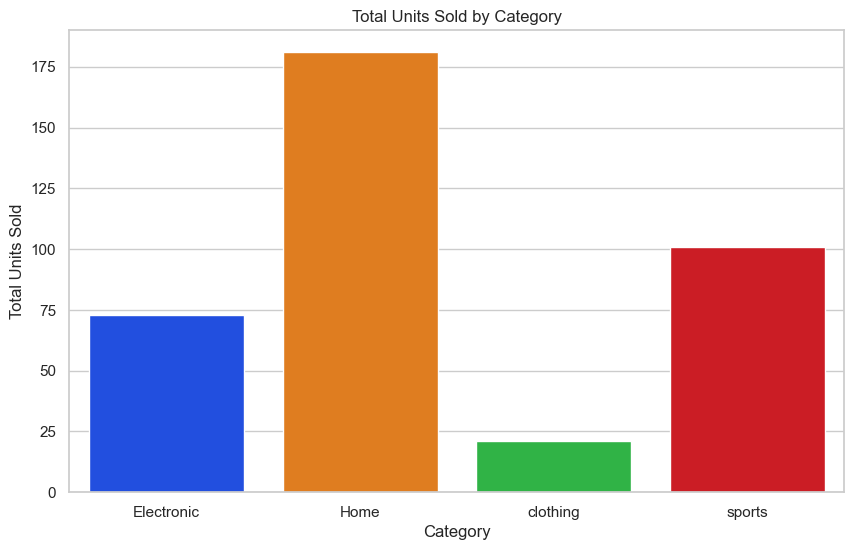

In [19]:
# Visualiazation
sns.set(style='whitegrid')
# plot distribution  of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'],bins=10,kde=True)
plt.title('Distribution of units sold')
plt.xlabel('units sold')
plt.ylabel('frequency')
plt.axvline(mean_sales, color='red', linestyle = '--', label = 'Mean')# axvline vertical axis line
plt.axvline(median_sales,color = 'blue', linestyle = '--', label = 'Median')
plt.axvline(mode_sales, color = 'green' , linestyle = '--', label = 'Mode')
plt.legend
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y= 'units_sold', data=sales_data)
plt.title('BoxPlot of units sold by category ')
plt.xlabel('category')
plt.ylabel('units sold')
plt.show()

# bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats,palette='bright')
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()